<a href="https://colab.research.google.com/github/Huwalli/PLta/blob/main/____part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 練習

In [ ]:
## jieba練習

In [ ]:
import jieba
list(jieba.cut("我喜歡在順天書屋吃牛肉麵"))

['我', '喜歡', '在', '順天書屋', '吃', '牛肉', '麵']

In [ ]:
jieba.add_word("牛肉麵")
list(jieba.cut("我喜歡在順天書屋吃牛肉麵"))

['我', '喜歡', '在', '順天書屋', '吃', '牛肉麵']

In [ ]:
#一次加很多詞到字典
my_words=["牛肉麵","順天書屋"]
for w in my_words:
  jieba.add_word(w)

In [ ]:
import jieba.analyse
text="擷取新聞一段下來測試"
jieba.analyse.extract_tags(text, topK=1)

['黃仁勳']

In [ ]:
jieba.analyse.textrank(text, topK=5)

['搭乘', '引發', '機場', '飛機', '私人']

In [ ]:
import jieba.posseg as pseg
for w, f in pseg.cut("我喜歡吃牛肉麵"):
  print(w, f)

我 r
喜歡 v
吃 v
牛肉麵 x


## 正則表達

In [25]:
import re

def extract_chinese(text):
    return ''.join(re.findall(r'[\u4e00-\u9fa5]', text))


In [26]:
extract_chinese("想要清理的句子")


'美國晶片大廠輝達執行長黃仁勳於月日晚間再度低調來台搭乘的私人飛機已於晚間時分降落台北松山機場這是他年第六度訪問台灣儘管行程並未提前公布但仍引發科技產業與媒體高度關注經後續查證發現實際上並非黃仁勳本人來台'

## 簡單文字雲圖生成

In [42]:
# 安裝中文字體 WQY（文泉驛微米黑）
!apt-get update -qq
!apt-get install -y fonts-wqy-zenhei

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-wqy-zenhei
0 upgraded, 1 newly installed, 0 to remove and 75 not upgraded.
Need to get 7,472 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-wqy-zenhei all 0.9.45-8 [7,472 kB]
Fetched 7,472 kB in 2s (4,844 kB/s)
Selecting previously unselected package fonts-wqy-zenhei.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-wqy-zenhei_0.9.45-8_all.deb ...
Unpacking fonts-wqy-zenhei (0.9.45-8) ...
Setting up fonts-wqy-zenhei (0.9.45-8) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


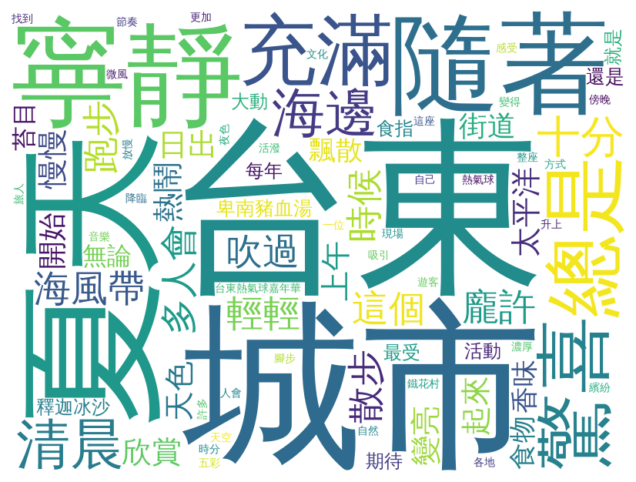

In [44]:
import jieba
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#=============================
# 1. 範例文章（你可改成任何內容）
#=============================
text = """
台東的夏天總是充滿驚喜。清晨的海邊十分寧靜，海風帶著鹹味，
輕輕吹過臉龐。許多人會在這個時候散步、跑步，欣賞太平洋上的日出。
隨著天色變亮，城市也慢慢熱鬧起來。

到了上午，台東的街道上開始飄散食物的香味。無論是米苔目、
卑南豬血湯，還是釋迦冰沙，都能讓人食指大動。每年夏天最受期待的活動，
就是台東熱氣球嘉年華。五彩繽紛的熱氣球升上天空，吸引來自各地的遊客，
讓整座城市變得更加活潑。

傍晚時分，許多人會到鐵花村聽現場音樂，感受濃厚的在地文化。
隨著夜色降臨，微風吹起，台東又恢復了寧靜。這座城市用最自然的方式，
讓每一位旅人放慢腳步，找到屬於自己的節奏。
"""

#=============================
# 2. 只保留中文
#=============================
def extract_chinese(s):
    return ''.join(re.findall(r'[\u4e00-\u9fa5]', s))

clean_text = extract_chinese(text)


#=============================
# 3. 自訂詞典（把專有名詞加入 jieba）
#=============================
jieba.add_word("台東熱氣球嘉年華")
jieba.add_word("卑南豬血湯")
jieba.add_word("釋迦冰沙")


#=============================
# 4. jieba 斷詞
#=============================
words = jieba.lcut(clean_text)
words = [w for w in words if len(w) > 1]  # 過濾單字（可視情況保留）


#=============================
# 5. 計算詞頻
#=============================
counts = Counter(words)


#=============================
# 6. 生成文字雲
#=============================
wc = WordCloud(
    font_path="/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc",  # 一定要中文字體
    background_color="white",
    width=800,
    height=600
)

wc.generate_from_frequencies(counts)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# 生成

In [ ]:
#保護並存放隱私資料（例如 API key或密碼）
from google.colab import userdata
apikey = userdata.get('test')

In [ ]:
#匯入gemini要用的模組
import google.generativeai as genai
import pandas as pd
import re

# 設定 Gemini API
genai.configure(api_key=apikey)
model = genai.GenerativeModel("gemini-1.5-flash")

# 生成內容
response = model.generate_content("假裝有四個國中生在聊天，他們聊關於未來志向，開頭請標示誰在說話，生成個25句")
text = response.text

# 分割每行
sentences = [line.strip() for line in text.strip().split("\n") if line.strip()]

sentences


['**小明:** 欸，你們最近有想過未來想做什麼嗎？我最近一直在想耶！',
 '**小華:**  我啊，一直想當個醫生！救死扶傷，多有成就感！',
 '**小美:**  醫生喔…聽起來壓力好大！我比較想當個作家，寫小說，自由自在的。',
 '**小強:**  作家？那收入穩定嗎？我比較務實一點，想當個工程師，穩定的工作比較重要啦！',
 '**小明:**  工程師也不錯啊！可以創造很多東西！',
 '**小華:**  對耶！想想看，我們設計的橋樑、建築物，可以造福很多人！',
 '**小美:**  可是寫小說也可以影響很多人啊！感動人心，啟發思考…',
 '**小強:**  嗯…各有各的優點啦！重點是找到自己喜歡，又能做得好的工作。',
 '**小明:**  說得也是！那小美，妳寫小說寫到哪了？',
 '**小美:**  我最近在寫一個奇幻故事，主角是一個會魔法的貓！',
 '**小華:**  哇！聽起來超酷的！',
 '**小強:**  貓咪會魔法？那得設計很多魔法種類吧？好複雜喔！',
 '**小明:**  對啊，感覺很燒腦！我比較喜歡簡單一點的，也許當個老師也不錯。',
 '**小華:**  老師？教什麼科目？',
 '**小明:**  數學吧！我覺得教導學生理解數學的樂趣，很有成就感。',
 '**小美:**  數學老師…聽起來好嚴肅！',
 '**小強:**  欸，你們有考慮過出國留學嗎？',
 '**小明:**  出國？有點想耶！去看看不同的世界。',
 '**小華:**  我也想！去美國讀醫學院！',
 '**小美:**  我比較想留在台灣，寫一些台灣的故事。',
 '**小強:**  我可能也會留在台灣，找個好公司上班。',
 '**小明:**  未來真的有很多可能性呢！',
 '**小華:**  是啊！好好努力，就能達成目標！',
 '**小美:**  加油！大家！',
 '**小強:**  一起努力！未來見！']

In [ ]:
# 解析 markdown 語法的說話者與內容
data = []
for sentence in sentences:
    match = re.match(r"\*\*(.+?)\:\*\*\s*(.+)", sentence)
    #如果成功匹配，就存進變數
    if match:
        speaker = match.group(1).strip()
        content = match.group(2).strip()
    else:
        speaker = ""
        content = sentence
    data.append({"說話者": speaker, "內容": content})

# 轉為表格
df = pd.DataFrame(data)

# 顯示表格
df

,說話者,內容
0,小明,欸，你們最近有想過未來想做什麼嗎？我最近一直在想耶！
1,小華,我啊，一直想當個醫生！救死扶傷，多有成就感！
2,小美,醫生喔…聽起來壓力好大！我比較想當個作家，寫小說，自由自在的。
3,小強,作家？那收入穩定嗎？我比較務實一點，想當個工程師，穩定的工作比較重要啦！
4,小明,工程師也不錯啊！可以創造很多東西！
5,小華,對耶！想想看，我們設計的橋樑、建築物，可以造福很多人！
6,小美,可是寫小說也可以影響很多人啊！感動人心，啟發思考…
7,小強,嗯…各有各的優點啦！重點是找到自己喜歡，又能做得好的工作。
8,小明,說得也是！那小美，妳寫小說寫到哪了？
9,小美,我最近在寫一個奇幻故事，主角是一個會魔法的貓！


In [ ]:

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()



# 連接 Google Sheets
gc = gspread.authorize(creds)

# 開啟指定的試算表（可以用網址中的 ID）
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1MfPDhP9K2pYqXsuj6fX1K-4YwNvyANGQEJ5OE1G1XzU/edit?usp=sharing')

# 選擇工作表（預設是第一個 sheet）
worksheet = spreadsheet.get_worksheet(0)

# 寫入 DataFrame 到 Google Sheets
set_with_dataframe(worksheet, df)

In [ ]:
#安裝 jieba 中文斷詞工具、中文文字分析工具
!pip install jieba
!pip install snownlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=0b5c4b05f6b9a23e51873133eb99b7d1227662ca5866dcfeb3656bb9aadaaeff
  Stored in directory: /root/.cache/pip/wheels/4a/fc/04/d1937c02b2a445b34754da55f71612a3df648a38d711bd17eb
Successfully built snownlp


In [ ]:
import jieba
from snownlp import SnowNLP
import pandas as pd
from collections import Counter
import re
import plotly.express as px

In [ ]:
df.head()

,說話者,內容
0,阿哲,欸，你們以後想幹嘛啊？我最近超煩惱的！
1,小美,我啊，想當醫生！救死扶傷，超有成就感！
2,大雄,醫生？聽起來壓力好大…我比較想當個遊戲設計師，整天設計遊戲，多爽！
3,小慧,設計遊戲也挺好的，不過要很會畫圖吧？我對美術沒什麼天分…我比較嚮往當個作家。
4,阿哲,作家？！寫小說很酷耶！那要寫什麼類型啊？奇幻？懸疑？


In [ ]:
dicts = df.copy()


In [ ]:
# 對 dicts 這個 DataFrame 每一行做處理
for _, row in dicts.iterrows():
    word = row['內容']  # 取得這一行中「內容」欄位的文字（這是我們想保留完整的詞）

    # 把這個詞加入 jieba 的字典中，freq 設高一點代表它很重要，會優先被切出
    jieba.add_word(word, freq=10000)

    # 告訴 jieba 在切詞時要建議優先保留這個詞，避免被切開
    jieba.suggest_freq(word, tune=True)


In [ ]:
# 只保留中文字
def extract_chinese(text):
    return ''.join(re.findall(r'[\u4e00-\u9fa5]', text))

In [ ]:
# 將「內容」欄位的文字傳入 extract_chinese 函式（通常是把非中文的東西清掉），
# 並新增一欄叫做 Chinese_Content 儲存純中文的內容。
df['Chinese_Content'] = df['內容'].apply(extract_chinese)

# 對 Chinese_Content 進行 Jieba 斷詞，將每個句子切成一個詞的 list到tokenized。
# 使用 HMM=True 表示使用隱馬可夫模型協助辨識新詞。
df['Tokenized'] = df['Chinese_Content'].apply(lambda x: list(jieba.cut(x, HMM=True)))

# 展開所有已斷詞的內容tokenized，合併成一個詞語的長列表。
# 只保留長度大於 1 的詞（過濾掉單字或無意義的字到all_words）。
all_words = [word for tokens in df['Tokenized'] for word in tokens if len(word) > 1]


In [ ]:
df['Chinese_Content']

,Chinese_Content
0,欸你們以後想幹嘛啊我最近超煩惱的
1,我啊想當醫生救死扶傷超有成就感
2,醫生聽起來壓力好大我比較想當個遊戲設計師整天設計遊戲多爽
3,設計遊戲也挺好的不過要很會畫圖吧我對美術沒什麼天分我比較嚮往當個作家
4,作家寫小說很酷耶那要寫什麼類型啊奇幻懸疑
5,我比較喜歡寫實一點的像醫療題材小說應該蠻有市場吧
6,醫療題材聽起來有點血腥我比較想做可愛風的遊戲那種治愈系的
7,嗯我比較想寫一些關於青春和成長的故事可能帶點奇幻元素
8,欸你們有考慮過未來會不會找不到工作嗎現在競爭這麼激烈
9,對齁當醫生競爭也很大要好好讀書才行


In [ ]:
all_words

['最近',
 '有想過',
 '未來',
 '什麼',
 '最近',
 '超煩惱',
 '爸媽',
 '一直',
 '當醫生',
 '可是',
 '超怕',
 '醫生',
 '太難',
 '想當',
 '拍拍',
 '影片',
 '好像',
 '要紅',
 '容易',
 '還要',
 '剪片',
 '還要',
 '企劃',
 '起來',
 '原本',
 '想當',
 '工程',
 '可是',
 '數學',
 '數學',
 '所以',
 '不想',
 '當醫生',
 '一堆',
 '化學',
 '公式',
 '你們',
 '不要',
 '考慮當',
 '廚師',
 '好吃',
 '好玩',
 '廚師',
 '辛苦',
 '每天',
 '而且',
 '薪水',
 '好像',
 '薪水',
 '我哥',
 '說當',
 '程式',
 '設計師',
 '薪水',
 '可是',
 '程式',
 '設計',
 '起來',
 '一堆',
 '程式',
 '腦袋',
 '爆炸',
 '那當',
 '老師',
 '好像',
 '穩定',
 '老師',
 '耐心',
 '耐心',
 '喜歡',
 '互動',
 '工作',
 '那當',
 '空姐',
 '可以',
 '處飛',
 '空姐',
 '英文',
 '而且',
 '壓力',
 '很大',
 '真的',
 '好多',
 '選擇',
 '不如',
 '我們',
 '學業',
 '顧好',
 '將來',
 '慢慢',
 '考試',
 '好比',
 '重要',
 '這麼',
 '這麼',
 '一說',
 '好像',
 '比較',
 '安心',
 '至少',
 '我們',
 '互相',
 '扶持',
 '一起',
 '加油',
 '未來',
 '還有',
 '很多',
 '機會',
 '一起',
 '努力',
 '不定',
 '我們',
 '未來',
 '還能',
 '一起',
 '合作']

In [ ]:
word_counts = Counter(all_words)
word_counts

Counter({'以後想': 1,
         '最近': 1,
         '超煩惱': 1,
         '當醫生': 2,
         '扶傷': 1,
         '超有': 1,
         '成就感': 1,
         '醫生': 1,
         '起來': 2,
         '壓力': 1,
         '當個': 2,
         '遊戲': 5,
         '設計師': 2,
         '整天': 1,
         '設計遊': 1,
         '戲多爽': 1,
         '設計': 2,
         '不過': 1,
         '很會': 1,
         '畫圖': 1,
         '美術': 2,
         '沒什麼': 1,
         '天分': 1,
         '作家': 3,
         '寫小說': 1,
         '很酷': 1,
         '什麼': 1,
         '類型': 1,
         '奇幻': 2,
         '懸疑': 1,
         '喜歡': 1,
         '實一點': 1,
         '醫療題': 1,
         '材小說': 1,
         '應該': 1,
         '市場': 1,
         '醫療': 1,
         '題材': 1,
         '有點': 2,
         '血腥': 1,
         '可愛風': 1,
         '那種': 1,
         '治愈': 1,
         '一些': 1,
         '關於': 1,
         '青春': 1,
         '成長': 1,
         '故事': 1,
         '可能': 2,
         '帶點': 1,
         '元素': 1,
         '考慮': 1,
         '過未來': 1,
         '不會': 1,
         '不到':

In [ ]:
# 排除停用詞（這裡提供一個簡單的停用詞列表，可根據需要擴展）
stop_words = set(['所以', '好', '因為', '大家', '的', '是', '了', '我', '也', '在', '和', '就', '不', '有', '他', '她', '你', '我們', '這個'])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stop_words}

In [ ]:
# 將詞頻轉為 DataFrame 並排序
word_freq_df = pd.DataFrame(filtered_word_counts.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# 繪製關鍵字統計的條形圖
fig = px.bar(word_freq_df.head(30), x='Word', y='Frequency',
             title='關鍵字出現次數統計（前20名）',
             labels={'Word': '關鍵字', 'Frequency': '出現次數'},
             text='Frequency')

fig.update_layout(
    xaxis_title="關鍵字",
    yaxis_title="出現次數",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    template='plotly_white'
)

fig.show()

In [ ]:
# 安裝中文字體 WQY（文泉驛微米黑）
!apt-get update -qq
!apt-get install -y fonts-wqy-zenhei

# 載入套件
from wordcloud import WordCloud
import plotly.express as px
import pandas as pd


# 取前 300 個最常出現的詞
top_words = word_freq_df.head(300)

# 使用 WQY Zenhei 字體
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'
)


# 根據詞頻生成文字雲
wordcloud.generate_from_frequencies(dict(zip(top_words['Word'], top_words['Frequency'])))

# 將文字雲轉換為圖像
wordcloud_img = wordcloud.to_array()

# 使用 Plotly 顯示文字雲
fig = px.imshow(wordcloud_img)
fig.update_layout(
    title="文字雲",
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    coloraxis_showscale=False
)
fig.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-wqy-zenhei is already the newest version (0.9.45-8).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:

# 計算每個說話者的討論數量
heatmap_data = df.groupby('說話者').size().reset_index(name='Discussion_Count')

# 繪製討論熱度的趨勢圖
fig = px.bar(heatmap_data, x='說話者', y='Discussion_Count',
             title='不同說話者的討論熱度',
             labels={'說話者': '說話者', 'Discussion_Count': '討論數量'},
             color='Discussion_Count', color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title="說話者",
    yaxis_title="討論數量",
    xaxis=dict(showgrid=True, tickangle=45),
    yaxis=dict(showgrid=True),
    template='plotly_white'
)

fig.show()


In [ ]:
prompt = f"請摘要出這些留言的重點，並補上重點中的情緒表現，把最多人呈現的情緒及其相關的內容整併在一起，說明這些人聊天的風向：{df.to_string()}"

response = model.generate_content(prompt)
print(response.text)

這段聊天記錄的核心主題是**對未來職業的迷茫與焦慮**。

**主要情緒：焦慮、不安、迷惘**

大多數人（小明、小美、小靜、大雄）都表達了對未來職業選擇的煩惱和不確定性。他們列舉了許多職業選項，例如醫生、YouTuber、工程師、廚師、程式設計師、老師、空姐等等，但都因為各種原因（例如怕血、數學不好、工作辛苦、壓力大等）而猶豫不決，並表達出相對應的負面情緒，例如「超煩惱」、「超怕血」、「太難了」、「很累」、「好難」、「很複雜」、「壓力很大」。  這些負面情緒展現了他們對未來的不確定性和擔憂。

**風向轉變：從迷惘到互相支持**

一開始，聊天的風向瀰漫著焦慮和迷茫的氛圍，大家各抒己見，卻始終找不到答案。  然而，隨著討論的深入，他們開始互相理解彼此的困難，並最終轉向互相支持和鼓勵。從第17條留言開始，他們不再糾結於職業選擇，而是選擇先專注於學業，並互相鼓勵、加油，展現出互相扶持、共同面對挑戰的積極態度。  最後的幾條留言充滿了希望和正能量，將整體的負面情緒緩和下來，轉向積極樂觀。



另一種方式：把自己的資料表csv匯入進行處理

這邊示範讀入自己的csv檔來進行文字雲圖生成

In [ ]:
#匯入需要的GOOGLE sheet資源
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets，google_sheet_url改成自己的google表單連結
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VOXqZ7uvAGN8X4pq0YJVf_y4nWQyz0f2jvpUX76i0GI/edit?gid=1289404087#gid=1289404087').sheet1

In [ ]:
# 讀取所有數據
rows = gsheets.get_all_records()
import pandas as pd
df = pd.DataFrame(rows)

In [ ]:
df.head()

,對話句子
0,**小明:** 欸欸欸，你們聽說了嗎？《星際戰艦Online》要出新DLC了！
1,**小麗:** 真的假的？我上禮拜才剛把所有成就解鎖完！這次會是什麼主題啊？
2,**大雄:** 聽說是外星蟲族入侵！還有新的戰艦和武器系統！
3,**靜香:** 哇！聽起來超酷的！那我們的課金又要開始了…
4,**小明:** 可不是嘛！我已經開始存錢準備買新戰艦了！


In [ ]:
dicts = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VOXqZ7uvAGN8X4pq0YJVf_y4nWQyz0f2jvpUX76i0GI/edit?gid=1289404087#gid=1289404087').get_worksheet(0)
dicts = dicts.get_all_records()
dicts = pd.DataFrame(dicts)

讀入自己的csv檔後的程式碼比照前面程式碼來修改